<a href="https://colab.research.google.com/github/ilhamajilaksono/projek_python/blob/main/klasifikasigambarcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


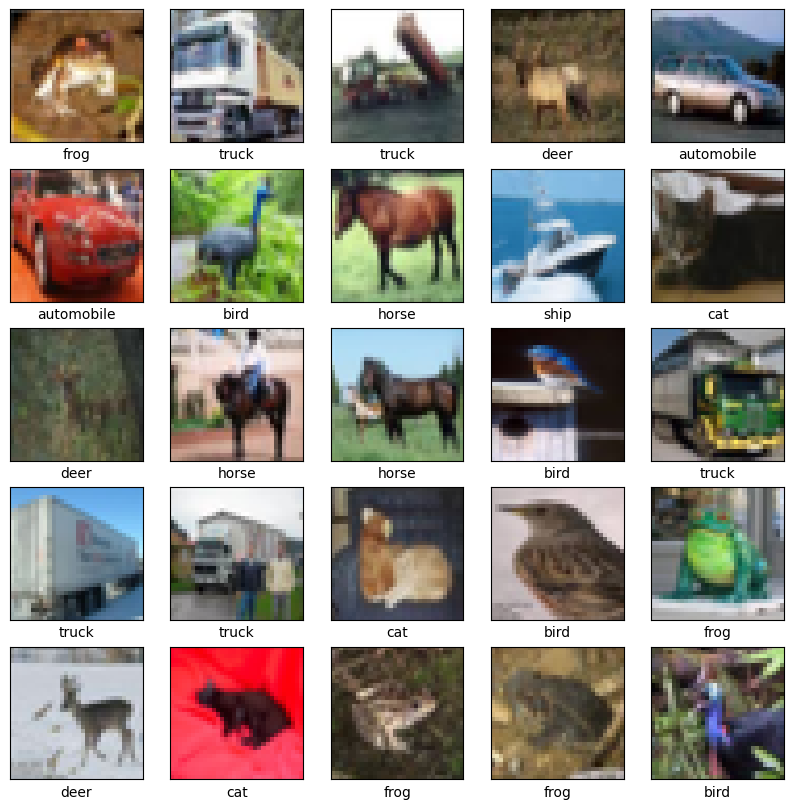

Epoch 1/10
1563/1563 [==============================] - 86s 54ms/step - loss: 1.5035 - accuracy: 0.4515 - val_loss: 1.2344 - val_accuracy: 0.5587
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1185 - accuracy: 0.6053 - val_loss: 1.0256 - val_accuracy: 0.6463
Epoch 3/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.9692 - accuracy: 0.6607 - val_loss: 0.9512 - val_accuracy: 0.6721
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8758 - accuracy: 0.6939 - val_loss: 0.9180 - val_accuracy: 0.6836
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8014 - accuracy: 0.7192 - val_loss: 0.8749 - val_accuracy: 0.6997
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7453 - accuracy: 0.7413 - val_loss: 0.9145 - val_accuracy: 0.6862
Epoch 7/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.6918 - accuracy: 0.7560 - val_loss: 0.8683 -

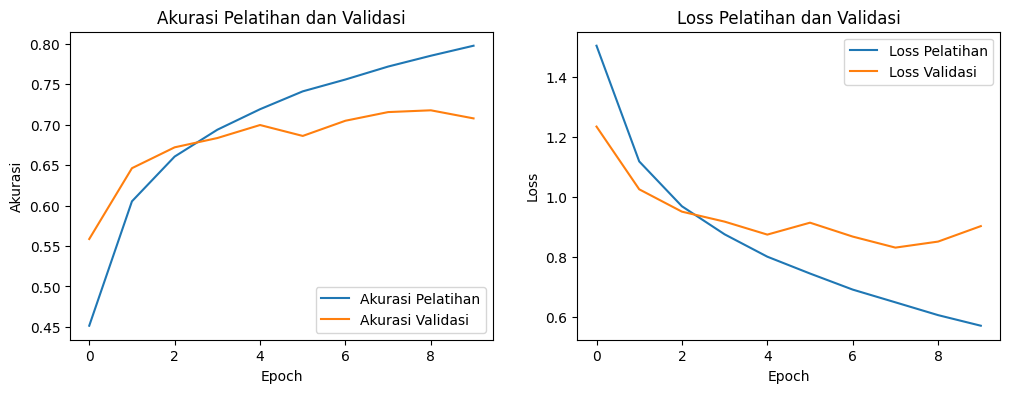

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Muat dan siapkan dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi nilai pixel gambar ke rentang 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Menampilkan beberapa gambar dari dataset CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Kompilasi model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Latih model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluasi model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Plot akurasi dan loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()



In [ ]:
# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Kompilasi model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Melihat ringkasan model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
# Latih model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4659 - accuracy: 0.4623 - val_loss: 1.1891 - val_accuracy: 0.5728
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1256 - accuracy: 0.6011 - val_loss: 1.0640 - val_accuracy: 0.6234
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9852 - accuracy: 0.6546 - val_loss: 0.9646 - val_accuracy: 0.6610
Epoch 4/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.8910 - accuracy: 0.6850 - val_loss: 0.9129 - val_accuracy: 0.6813
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8182 - accuracy: 0.7148 - val_loss: 0.8683 - val_accuracy: 0.6982
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7575 - accuracy: 0.7357 - val_loss: 0.8541 - val_accuracy: 0.7071
Epoch 7/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.7126 - accuracy: 0.7508 - val_loss: 0.8633 -

313/313 - 4s - loss: 0.8817 - accuracy: 0.7090 - 4s/epoch - 11ms/step

Test accuracy: 0.7089999914169312


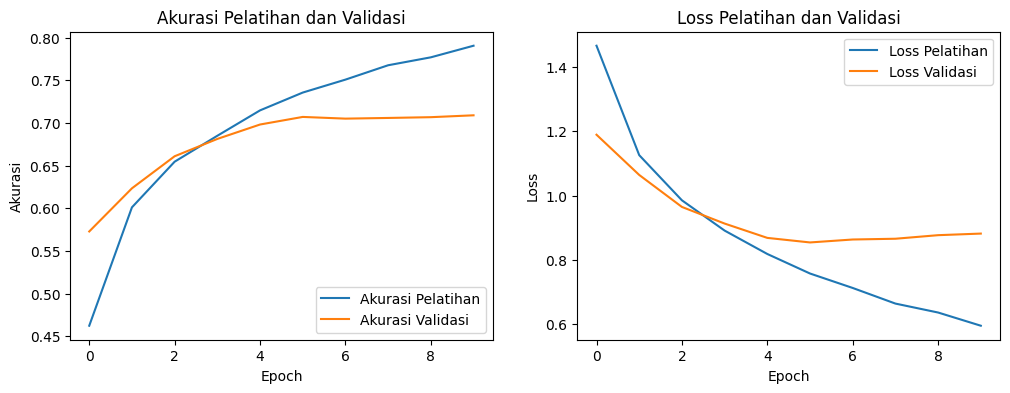

In [ ]:
# Evaluasi model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Plot akurasi dan loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc='lower right')
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss Pelatihan dan Validasi')

plt.show()


313/313 [==============================] - 5s 15ms/step


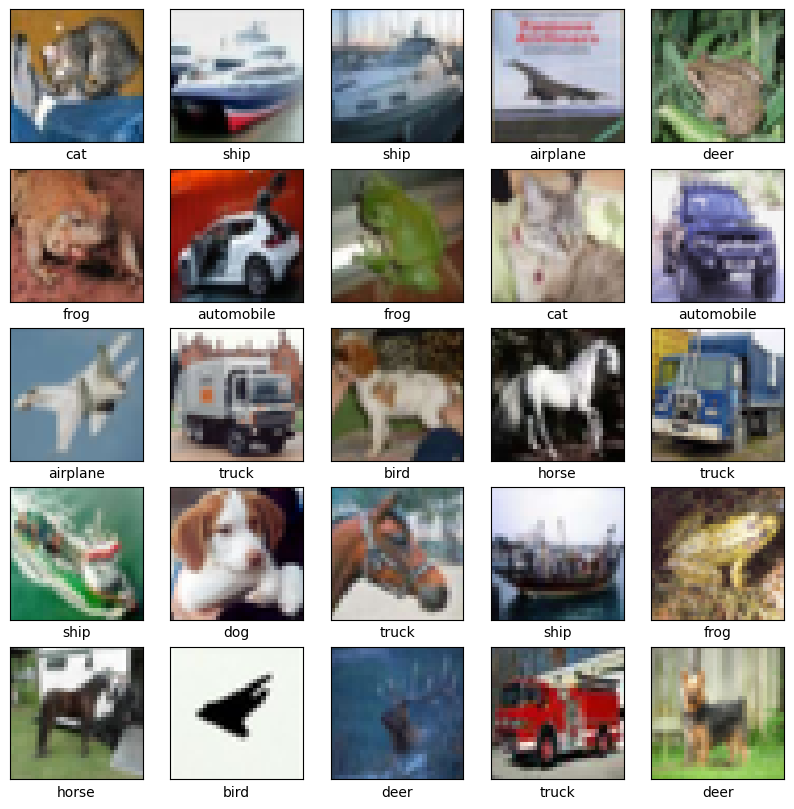

In [ ]:
# Menggunakan model untuk prediksi
predictions = model.predict(test_images)

# Menampilkan beberapa hasil prediksi
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(class_names[tf.argmax(predictions[i])])
plt.show()
